## 2020-04-09
* The below notebook was adjusted from [COMBLE-MIP](https://arm-development.github.io/comble-mip/).
* It compares selected simulations against observational targets that were collected from satellite and ground-based retrievals.
* In case of questions or concerns, please notify [Ann Fridlind](mailto:ann.fridlind@nasa.gov) and [Florian Tornow](mailto:ft2544@columbia.edu).
* Please check out our [description of this case](https://nasa-giss.github.io/LES-SCM/notebooks/case_descr_20200409.html).

In [1]:
%run functions_plotting.py 
 
## select simulations to plot
sim_keyword = '20200409'  

In [2]:
## load ERA5 fields
#era5_1d, era5_2d = load_era5(PATH='../data_files/')
era5_1d = load_era5csv(case=sim_keyword)

## load radiosondes
rs_dat = load_rs(case=sim_keyword,t_filter = 7.)

## load DOE ARM site statistics
kazrkollias_dat = load_kazrkollias(case=sim_keyword,t_filter = 6.,aux_dat=rs_dat) ## here using radiosonde profiles to estimate CTT
kazrclough_dat = load_kazrclough(case=sim_keyword,t_filter = 6.) 
aeri_dat = load_aeri(case=sim_keyword,t_filter = 6.)
radflux_dat = load_radflux(case=sim_keyword,t_filter = 6.)
#srfflux_dat = load_flux(case=sim_keyword,t_filter = 6.)

## load CARRA surface fluxes
#carra_dat = load_carraflux()

## load MAC-LWP
maclwp_dat = load_maclwp(case=sim_keyword,t_filter = 0.) 

## load MODIS, VIIRS, and SENTINEL retrievals
modis_dat    = load_modis(case=sim_keyword,t_filter = 0.,sza_filter = 75.)
viirs_dat    = load_viirs(case=sim_keyword,t_filter = 0.,sza_filter = 75.)
#sentinel_dat = load_sentinel(case=sim_keyword,t_filter = 0.,sza_filter = 65.)

## load CERES retrievals
ceres_dat = load_ceres(case=sim_keyword,t_filter = 0.)

## load CALIPSO retrievals (note the increased time window)
calipso_dat = load_calipso(case=sim_keyword,t_filter = 3.)

../data_files/anxsondewnpnM1.b1.20200409.233300.cdf
../data_files/anxsondewnpnM1.b1.20200409.172800.cdf
../data_files/anxsondewnpnM1.b1.20200409.112500.cdf
KAZR (Kollias): here using auxiliary field to estimate cloud-top temperature


/gpfsm/dhome/tflorian/LES-SCM/notebooks/functions_plotting.py:554: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  aux_dat['zdiff'] = np.abs(aux_dat['zf'] - np.float64(p_df['zi']))
/gpfsm/dhome/tflorian/LES-SCM/notebooks/functions_plotting.py:555: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  aux_dat['zdiff.25'] = np.abs(aux_dat['zf'] - np.float64(p_df['zi.25']))
/gpfsm/dhome/tflorian/LES-SCM/notebooks/functions_plotting.py:556: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  aux_dat['zdiff.75'] = np.abs(aux_dat['zf'] - np.float64(p_df['zi.75']))


In [3]:
aeri_dat

,Unnamed: 0,time.abs,altitude,qv,rh,temp,theta,time,ta,zf,ua,va,class
time.abs,,,,,,,,,,,,,
13.250000,1706,47699.999,0.000000,0.003363,82.787895,1.029313,273.233124,111600.0,274.179313,0.000000,NaN,NaN,AERI
13.250000,1707,47699.999,0.010000,0.003050,84.474457,-0.604708,271.701843,111600.0,272.545292,10.000000,NaN,NaN,AERI
13.250000,1708,47699.999,0.021000,0.002950,81.821877,-0.641333,271.772400,111600.0,272.508667,21.000000,NaN,NaN,AERI
13.250000,1709,47699.999,0.033100,0.002883,79.158386,-0.523477,272.007812,111600.0,272.626523,33.100002,NaN,NaN,AERI
13.250000,1710,47699.999,0.046410,0.002842,78.030869,-0.543416,272.117615,111600.0,272.606584,46.410002,NaN,NaN,AERI
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13.333333,1811,47999.999,11.639103,NaN,2.661680,-61.366245,NaN,111600.0,NaN,11639.102936,NaN,NaN,AERI
13.333333,1812,47999.999,12.813013,NaN,3.176039,-61.878368,NaN,111600.0,NaN,12813.013077,NaN,NaN,AERI
13.333333,1813,47999.999,14.104314,NaN,3.351269,-63.230335,NaN,111600.0,NaN,14104.313850,NaN,NaN,AERI


In [4]:
## load all simulations located in subfolders of the given directory
var_vec_1d = ['z0','z0h','z0q','hfss','hfls','ts'] # variables with ERA5 (longer time axis)
var_vec_2d = ['theta','qv','ua','va']
df_col_1d_les,df_col_2d_les = load_sims('../output_les/',var_vec_1d,var_vec_2d,t_shift=0,keyword=sim_keyword,subfolder='s')
df_col_1d_scm,df_col_2d_scm = load_sims('../output_scm/',var_vec_1d,var_vec_2d,t_shift=0,keyword=sim_keyword,subfolder='s')

Loading variables: f(time)
../output_les/dharma/comble_20200409_diagNa.nc
../output_les/dharma/comble_20200409_progNa_noice.nc
../output_les/dharma/comble_20200409_progNa.nc
../output_les/dharma/comble_20200409_diagNa_noice.nc
Loading variables: f(time,height)
../output_les/dharma/comble_20200409_diagNa.nc
../output_les/dharma/comble_20200409_progNa_noice.nc
../output_les/dharma/comble_20200409_progNa.nc
../output_les/dharma/comble_20200409_diagNa_noice.nc
Loading variables: f(time)
../output_scm/modele/comble_20200409_diagNa.nc
../output_scm/modele/comble_20200409_diagNa_noice.nc
Loading variables: f(time,height)
../output_scm/modele/comble_20200409_diagNa.nc
../output_scm/modele/comble_20200409_diagNa_noice.nc


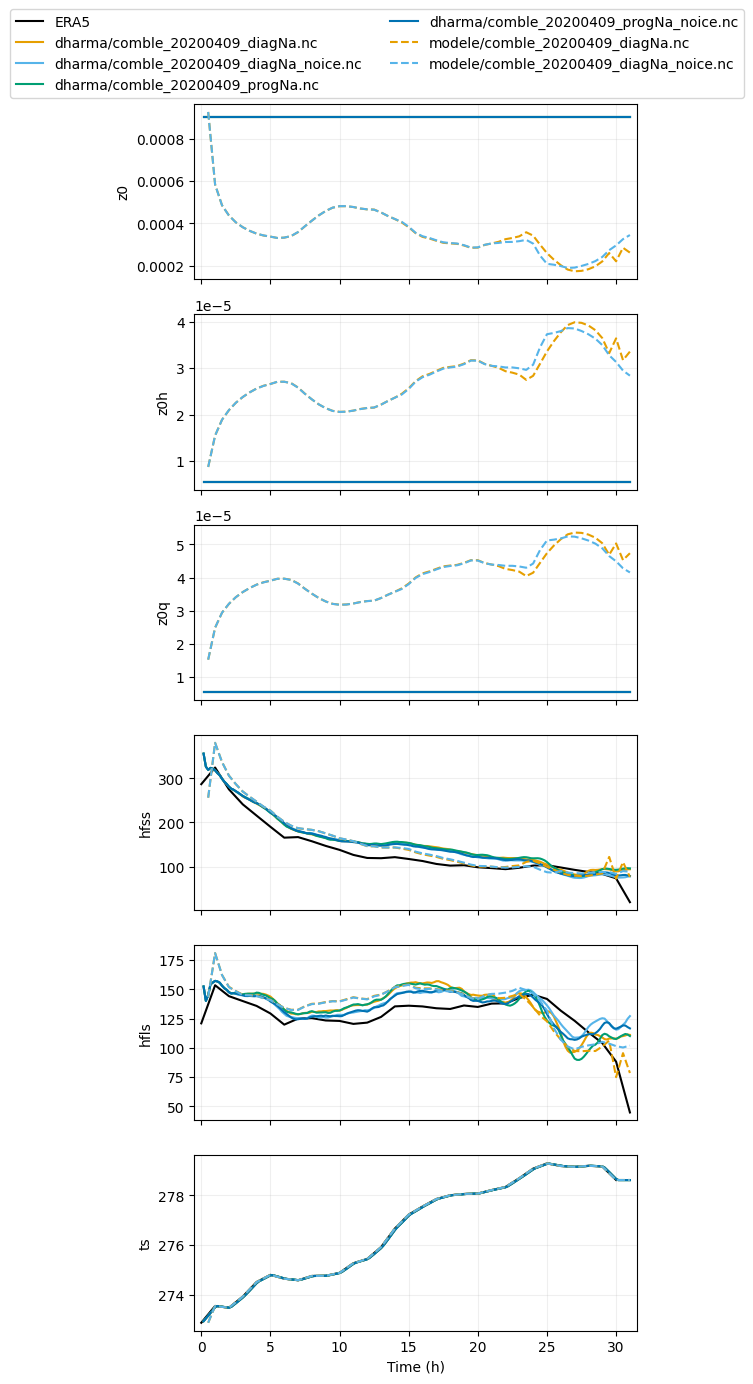

In [5]:
%run functions_plotting.py 

## plot variables that have only time dependence
#plot_1d(pd.concat([df_col_1d,era5_1d,carra_dat,srfflux_dat]),var_vec_1d)dependence
#plot_1d(pd.concat([df_col_1d_les,df_col_1d_scm,era5_1d,carra_dat,srfflux_dat]),var_vec_1d)
plot_1d(pd.concat([df_col_1d_les,df_col_1d_scm,era5_1d]),var_vec_1d) #t0=-13,t1=18)

In [6]:
%run functions_plotting.py 

## load all simulations located in subfolders of the given directory
var_vec_1d = ['lwpr','lwpc','iwp','od','clt','rlut','cf','nqc'] # variables without ERA5 (shorter time axis)
var_vec_2d_les = ['theta','qv','qlc','qlr','ta','ua','va','qic','qis','qig','ua','va','ta','prf']
var_vec_2d_scm = ['theta','qv','qlc','qlr','ta','ua','va','qicc','qics','qipc','qips','ua','va','ta','prf','fc']
df_col_1d_les,df_col_2d_les = load_sims('../output_les/',var_vec_1d,var_vec_2d_les,t_shift=0,keyword=sim_keyword,diag_zi_ctt=True)
df_col_1d_scm,df_col_2d_scm = load_sims('../output_scm/',var_vec_1d,var_vec_2d_scm,t_shift=0,keyword=sim_keyword,diag_zi_ctt=True)
df_col_1d_scm['clt'] = df_col_1d_scm['cf']/100.

Loading variables: f(time)
../output_les/dharma/comble_20200409_diagNa.nc
cf not found in ../output_les/dharma/comble_20200409_diagNa.nc
../output_les/dharma/comble_20200409_progNa_noice.nc
iwp shows NAN values in ../output_les/dharma/comble_20200409_progNa_noice.nc
cf not found in ../output_les/dharma/comble_20200409_progNa_noice.nc
../output_les/dharma/comble_20200409_progNa.nc
cf not found in ../output_les/dharma/comble_20200409_progNa.nc
../output_les/dharma/comble_20200409_diagNa_noice.nc
iwp shows NAN values in ../output_les/dharma/comble_20200409_diagNa_noice.nc
cf not found in ../output_les/dharma/comble_20200409_diagNa_noice.nc
Loading variables: f(time,height)
../output_les/dharma/comble_20200409_diagNa.nc
../output_les/dharma/comble_20200409_progNa_noice.nc
qic shows NAN values in ../output_les/dharma/comble_20200409_progNa_noice.nc
qis shows NAN values in ../output_les/dharma/comble_20200409_progNa_noice.nc
qig shows NAN values in ../output_les/dharma/comble_20200409_progNa

/usr/local/other/anaconda/GEOSpyD/24.3.0-0/2024-08-29/envs/py3.12/lib/python3.12/site-packages/matplotlib/cbook.py:1699: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)


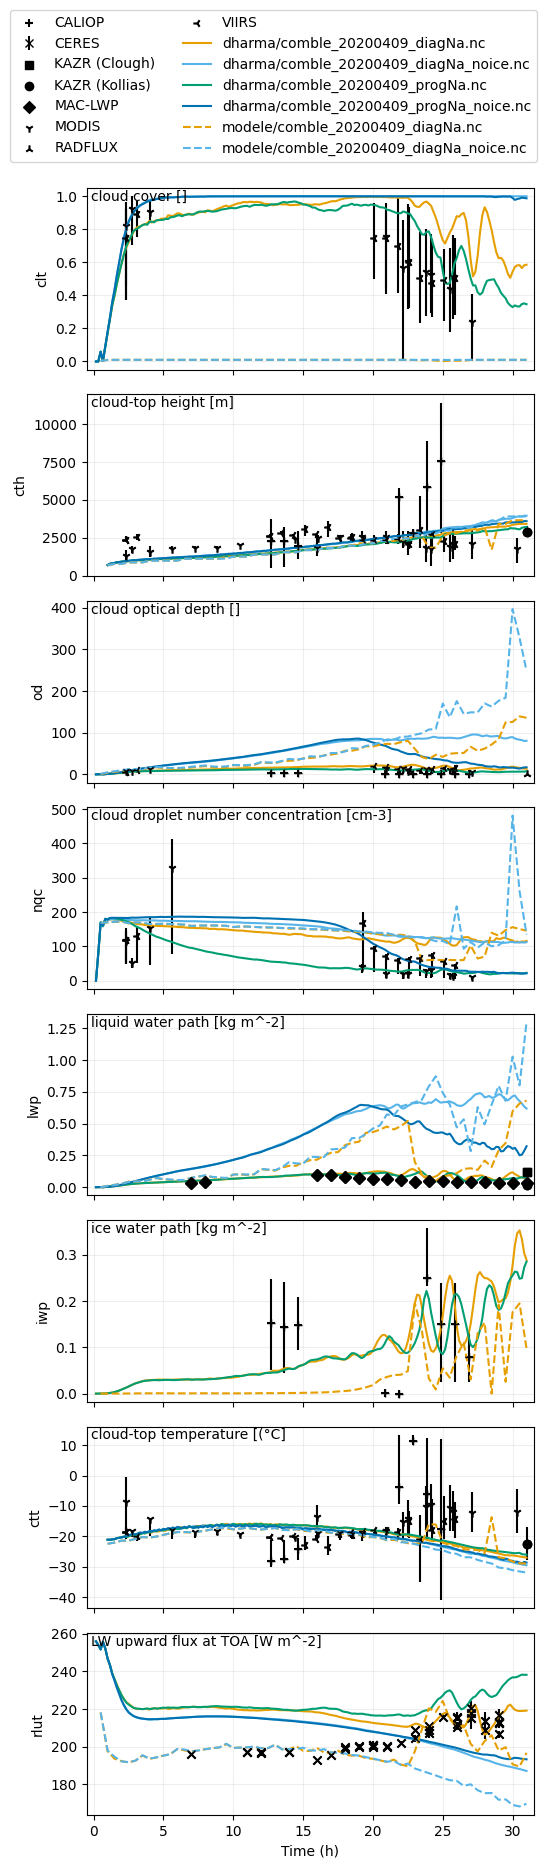

In [7]:
%run functions_plotting.py 
## plot variables that have only time dependence
#plot_1d(pd.concat([df_col_1d,maclwp_dat,modis_dat,viirs_dat,sentinel_dat,kazrkollias_dat,kazrclough_dat,calipso_dat,radflux_dat]),['zi','od','lwp','iwp','ctt'])

#plot_1d(pd.concat([df_col_1d,maclwp_dat,kazrkollias_dat,kazrclough_dat,calipso_dat,radflux_dat]),['cth','od','lwp','iwp','ctt'],longnames=['cloud-top height','cloud optical depth','liquid water path','ice water path','cloud-top temperature'],units=['m','','kg m^-2','kg m^-2','C'])
#plot_1d(pd.concat([df_col_1d_les,df_col_1d_scm,maclwp_dat,kazrkollias_dat,kazrclough_dat,calipso_dat,radflux_dat]),['cth','od','lwp','iwp','ctt'],longnames=['cloud-top height','cloud optical depth','liquid water path','ice water path','cloud-top temperature'],units=['m','','kg m^-2','kg m^-2','C'])
plot_1d(pd.concat([df_col_1d_les,df_col_1d_scm,maclwp_dat,kazrkollias_dat,kazrclough_dat,calipso_dat,modis_dat,viirs_dat,radflux_dat,ceres_dat]),['clt','cth','od','nqc','lwp','iwp','ctt','rlut'],
        longnames=['cloud cover','cloud-top height','cloud optical depth','cloud droplet number concentration','liquid water path','ice water path','cloud-top temperature','LW upward flux at TOA'],
        units=['','m','','cm-3','kg m^-2','kg m^-2','(°C','W m^-2']) #t0=-13,t1=18)

## plot variables that have only time dependence (for now excluding imager retrievals that are mostly SZA > 70)
#plot_1d(pd.concat([df_col_1d,maclwp_dat,kazrkollias_dat,kazrclough_dat,calipso_dat,gongiwp_dat,radflux_dat]),['od','lwp','iwp']) #'zi','od','lwp','iwp

Computing wind speed
Computing wind direction
temporal averaging over 1.0 h interval


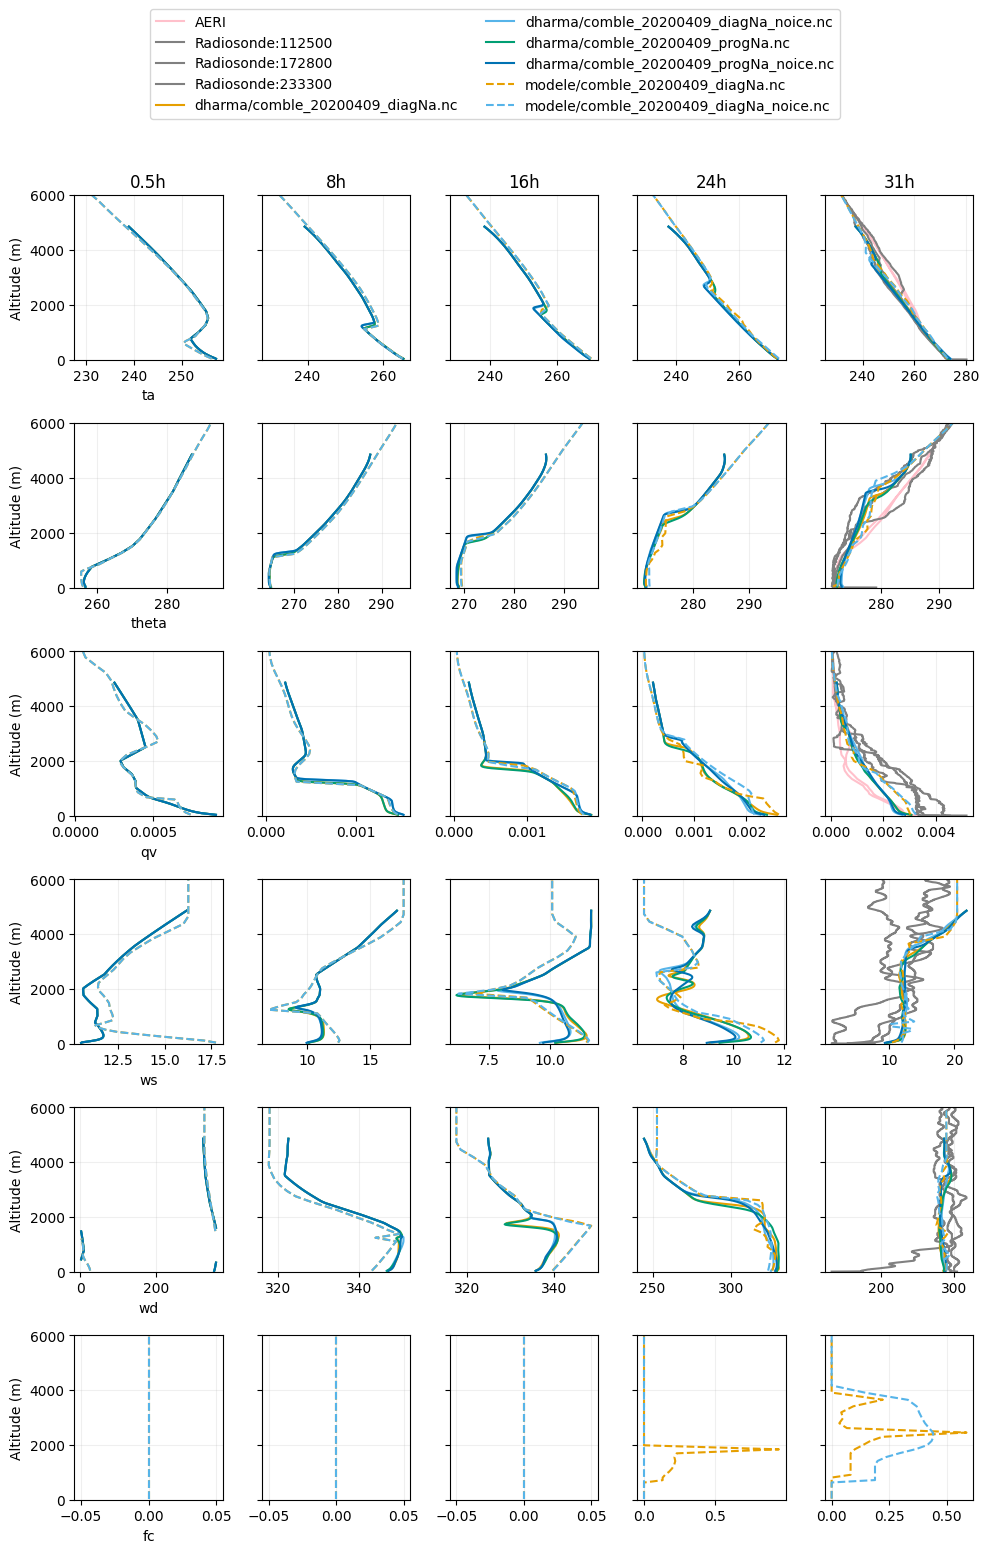

<Figure size 1000x600 with 0 Axes>

In [8]:
%run functions_plotting.py

## plot all variables that have time and height dependence
#plot_2d(df_col_2d,var_vec_2d,[0,3,6,9,12,15,18],z_max=6000)
     
## example where ERA5 and radiosonde are included
#plot_2d(pd.concat([df_col_2d,era5_2d,rs_dat,aeri_dat]),var_vec = ['ta','theta','qv','ws','wd'],times=[-1.5,0,4,8,18],z_max=6000)
#plot_2d(pd.concat([df_col_2d_les,df_col_2d_scm,era5_2d,rs_dat,aeri_dat]),var_vec = ['ta','theta','qv','ws','wd'],times=[-1.5,0,4,8,18],z_max=6000)
plot_2d(pd.concat([df_col_2d_les,df_col_2d_scm,rs_dat,aeri_dat]),var_vec = ['ta','theta','qv','ws','wd','fc'],times=[0.5,8,16,24,31],z_max=6000)
